In [959]:
# 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns

In [960]:
# 데이터 불러오기
trip_df = pd.read_csv('/aiffel/data/trip.csv')

In [961]:
# 첫 5행 확인하여 데이터 구조 보기
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [962]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [963]:
# 데이터 정보 확인
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [964]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [965]:
# 결측치 판단 및 처리
# 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리하기

In [966]:
# 결측치 합계 확인하기
trip_df.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [967]:
# 결측치 비율 확인하기
trip_df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [968]:
# fare_amount 칼럼 확인하기
trip_df['fare_amount']

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22701, dtype: float64

In [969]:
# fare_amount 칼럼 오름차순 정렬하기
trip_df['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
20314    450.00
8478     999.99
52          NaN
189         NaN
244         NaN
Name: fare_amount, Length: 22701, dtype: float64

In [970]:
# 결측치 확인하기
trip_df['fare_amount'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
22696    False
22697    False
22698    False
22699    False
22700    False
Name: fare_amount, Length: 22701, dtype: bool

In [971]:
# 전체 칼럼에 대한 결측치 True 행 확인하기
trip_df[trip_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [972]:
# 전체 비중에서 매우 작은 비중으로 결측값 있는 행 삭제하기
trip_df.dropna(subset = ['fare_amount'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [973]:
# 덮어쓰기
trip_df = trip_df.dropna(subset = ['fare_amount'])

In [974]:
# 결측치 행 호출해보기
trip_df[trip_df['fare_amount'].isna()].index

Int64Index([], dtype='int64')

In [975]:
# fare_amount 평균 확인하기
trip_df['fare_amount'].mean()

13.02400916380298

In [976]:
fare_na_index

Int64Index([52, 189, 244], dtype='int64')

In [977]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [978]:
#전체 데이터 프레임 다시 확인
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:ylabel='passenger_count'>

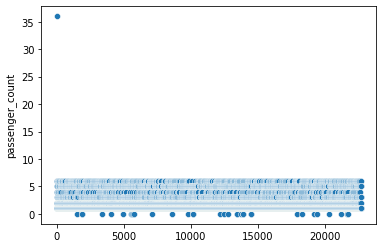

In [979]:
# passenger_count scatterplot으로 산점도 시각화하기
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

In [980]:
# passenger_count 내림차순 정렬하기
trip_df['passenger_count'].sort_values(ascending = False)

64       36
0         6
10452     6
17059     6
18101     6
         ..
4062      0
3354      0
13921     0
21640     0
19458     0
Name: passenger_count, Length: 22698, dtype: int64

In [981]:
# passenger_count=0 확인하기
trip_df[trip_df['passenger_count']==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [982]:
# passenger_count가 0인 경우의 전체 대비 비중
(trip_df['passenger_count'] == 0).mean()

0.0014538725878932065

In [983]:
# passengar_count가 0인 경우와 아닌 경우를 따로 데이터셋 구분해두기
trip_df_zero = trip_df[trip_df['passenger_count'] == 0]
trip_df_non_zero = trip_df[trip_df['passenger_count'] > 0]

In [984]:
# passenger_count가 0인 경우를 1로 대체
trip_df['passenger_count'] = trip_df['passenger_count'].apply(lambda x: 1 if x == 0 else x)

/tmp/ipykernel_32/2641778082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_df['passenger_count'] = trip_df['passenger_count'].apply(lambda x: 1 if x == 0 else x)


In [985]:
# passenger_count=0 확인하기
trip_df[trip_df['passenger_count']==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [986]:
# 이상치 판단 및 처리
# 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거

In [987]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:ylabel='trip_distance'>

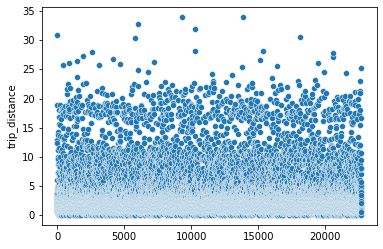

In [988]:
# trip_distance scatterplot으로 산점도 시각화하기
sns.scatterplot(x = trip_df.index, y = trip_df['trip_distance'])

<AxesSubplot:ylabel='tip_amount'>

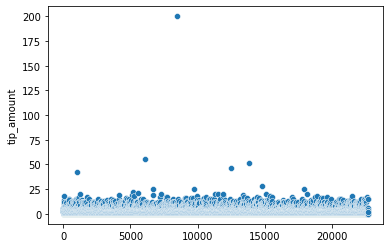

In [989]:
# tip_amount scatterplot으로 산점도 시각화하기
sns.scatterplot(x = trip_df.index, y = trip_df['tip_amount'])

In [990]:
# tip_amount 오름차순 정렬하기
trip_df['tip_amount'].sort_values()

16784      0.00
8184       0.00
19799      0.00
8189       0.00
8192       0.00
          ...  
986       42.29
12513     46.69
13863     51.64
6066      55.50
8478     200.00
Name: tip_amount, Length: 22698, dtype: float64

In [991]:
# tip_amount 꼬리 20개 출력해보기
trip_df['tip_amount'].sort_values().tail(20)

4140      18.95
5126      19.55
18132     19.85
11544     20.00
11904     20.00
1254      20.00
11271     20.00
15111     20.00
7283      20.16
5538      21.30
5212      22.22
17936     25.00
9716      25.20
6710      25.20
14827     28.00
986       42.29
12513     46.69
13863     51.64
6066      55.50
8478     200.00
Name: tip_amount, dtype: float64

In [992]:
# 8478행 전체 출력하기
trip_df.loc[8478]

passenger_name                   Alexis Hanson
tpep_pickup_datetime     02/06/2017 5:50:10 AM
tpep_dropoff_datetime    02/06/2017 5:51:08 AM
payment_method                     Credit Card
passenger_count                              1
trip_distance                              2.6
fare_amount                             999.99
tip_amount                               200.0
tolls_amount                               0.0
Name: 8478, dtype: object

In [993]:
# 8478행 이상치로 판단, 삭제하기
trip_df.drop(8478, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [994]:
# tip_amount 이상치 행 삭제 확인
trip_df['tip_amount'].sort_values()

4594      0.00
20564     0.00
11805     0.00
5938      0.00
11806     0.00
         ...  
14827    28.00
986      42.29
12513    46.69
13863    51.64
6066     55.50
Name: tip_amount, Length: 22697, dtype: float64

<AxesSubplot:ylabel='fare_amount'>

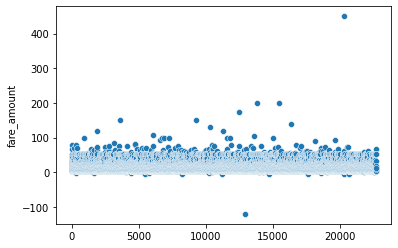

In [995]:
# fare_amount scatterplot으로 산점도 시각화하기
sns.scatterplot(x = trip_df.index, y = trip_df['fare_amount'])

In [996]:
# fare_amount 살펴보기
trip_df['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
3584     152.00
12513    175.00
15476    200.00
13863    200.01
20314    450.00
Name: fare_amount, Length: 22697, dtype: float64

In [997]:
# fare_amount 0보다 작거나 같은 경우
trip_df[trip_df['fare_amount'] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.0,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.00,0.0,0.0,0.0


In [998]:
# fare_amount가 0보다 큰 경우를 남기고 필터링
trip_df = trip_df[trip_df['fare_amount'] >0]

In [999]:
# fare_amount 칼럼 오름차순 확인하기
trip_df['fare_amount'].sort_values()

4063       0.01
14285      0.01
13972      1.00
13829      2.50
21196      2.50
          ...  
3584     152.00
12513    175.00
15476    200.00
13863    200.01
20314    450.00
Name: fare_amount, Length: 22677, dtype: float64

In [1000]:
# 20314 행이 이상치인지, 문제가 있는 데이터인지 확인하기 위해 체크 -- 탔다가 바로 내린 경우로 보임 -- 삭제결정
trip_df.loc[20314]

passenger_name                 Nicholas Thomas
tpep_pickup_datetime     12/19/2017 9:40:46 AM
tpep_dropoff_datetime    12/19/2017 9:40:55 AM
payment_method                            Cash
passenger_count                              2
trip_distance                              0.0
fare_amount                              450.0
tip_amount                                 0.0
tolls_amount                               0.0
Name: 20314, dtype: object

In [1001]:
# 20314행 삭제하기
trip_df.drop(20314, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1002]:
print(trip_df.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22691, 22692, 22693, 22694, 22695, 22696, 22697, 22698, 22699,
            22700],
           dtype='int64', length=22676)


In [1003]:
# fare_amount 칼럼 오름차순 확인하기 -- 450 값 삭제 확인완료
trip_df['fare_amount'].sort_values()

14285      0.01
4063       0.01
13972      1.00
18699      2.50
14064      2.50
          ...  
9282     150.00
3584     152.00
12513    175.00
15476    200.00
13863    200.01
Name: fare_amount, Length: 22676, dtype: float64

<AxesSubplot:ylabel='tolls_amount'>

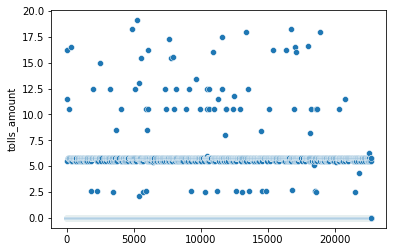

In [1004]:
# tolls_amount scatterplot
sns.scatterplot(x = trip_df.index, y = trip_df['tolls_amount'])

In [1005]:
trip_df['tolls_amount'].describe()

count    22676.000000
mean         0.312053
std          1.397079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.100000
Name: tolls_amount, dtype: float64

In [1006]:
trip_df['tolls_amount'].sort_values().tail(20)

2480     15.00
5538     15.50
7748     15.50
7931     15.58
10877    16.00
17113    16.00
15423    16.20
6066     16.26
16381    16.26
22       16.26
17048    16.50
318      16.50
17961    16.62
7629     17.28
11562    17.50
13361    18.00
18890    18.00
4887     18.26
16707    18.28
5273     19.10
Name: tolls_amount, dtype: float64

In [1007]:
#이동 시간 분석하기

In [1008]:
trip_df = trip_df.copy()

In [1009]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [1010]:
# tpep_pickup_datetime 및 tpep_dropoff_datetime을 datetime 형식으로 변환
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [1011]:
# 변환된 tpep_pickup_datetime 열 확인
print(trip_df['tpep_pickup_datetime'].head())

0   2017-03-25 08:55:43
1   2017-04-11 14:53:28
2   2017-12-15 07:26:56
3   2017-05-07 13:17:59
4   2017-04-15 23:32:20
Name: tpep_pickup_datetime, dtype: datetime64[ns]


In [1012]:
# 이동 시간 계산 (분 단위)
trip_df['trip_duration'] = (trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [1013]:
# 이동 시간 통계 확인
print(trip_df['trip_duration'].describe())

count    22676.000000
mean        16.959539
std         61.343806
min        -16.983333
25%          6.666667
50%         11.183333
75%         18.383333
max       1439.550000
Name: trip_duration, dtype: float64


In [1014]:
trip_df['trip_duration'].sort_values()

9358      -16.983333
12503       0.000000
21979       0.000000
8841        0.000000
1207        0.000000
            ...     
15165    1438.550000
22640    1438.650000
15000    1438.850000
15581    1439.150000
926      1439.550000
Name: trip_duration, Length: 22676, dtype: float64

<AxesSubplot:ylabel='trip_duration'>

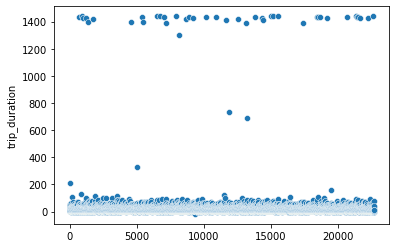

In [1015]:
# trip_duration 칼럼의 scatterplot 확인하기
sns.scatterplot(x = trip_df.index, y = trip_df['trip_duration'])

In [1016]:
1439/60

23.983333333333334

In [1017]:
600/60

10.0

In [1018]:
# 음수이거나 600분이 넘는 trip_duration 행 필터링 및 출력
trip_df[(trip_df['trip_duration'] < 0) | (trip_df['trip_duration'] > 600)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.00,1430.833333
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,1439.550000
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,1430.033333
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.00,1424.850000
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,1399.400000
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,1420.350000
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,1394.883333
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,1431.066667
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Credit Card,1,0.62,5.5,0.00,0.00,1399.983333
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,1437.833333


In [1019]:
outliers_duration = trip_df[(trip_df['trip_duration'] < 0) | (trip_df['trip_duration'] > 600)]

In [1020]:
#outliers 갯수, 전체 행 갯수 체크
outliers_count = outliers.shape[0]
total_count = trip_df.shape[0]

In [1021]:
#outliers 비중 계산하기
outliers_ratio = outliers_count/total_count
outliers_ratio

0.0018521785147292292

In [1022]:
# 이상치 제거
trip_df = trip_df[(trip_df['trip_duration'] >= 0) & (trip_df['trip_duration'] <= 600)]

In [1023]:
print(trip_df['trip_duration'].describe())

count    22632.000000
mean        14.353217
std         11.849683
min          0.000000
25%          6.650000
50%         11.166667
75%         18.304167
max        332.116667
Name: trip_duration, dtype: float64


In [1024]:
332/60

5.533333333333333

In [1025]:
trip_df['trip_duration'].sort_values()

2442       0.000000
21838      0.000000
17272      0.000000
8841       0.000000
12503      0.000000
            ...    
11544    118.866667
820      129.316667
19485    159.316667
30       209.166667
5053     332.116667
Name: trip_duration, Length: 22632, dtype: float64

In [1026]:
trip_df.loc[5053]

passenger_name                 Manuel Haynes
tpep_pickup_datetime     2017-08-07 18:27:53
tpep_dropoff_datetime    2017-08-08 00:00:00
payment_method                          Cash
passenger_count                            1
trip_distance                          14.35
fare_amount                             50.5
tip_amount                             10.46
tolls_amount                             0.0
trip_duration                     332.116667
Name: 5053, dtype: object

In [1027]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,11.933333


In [1028]:
#택시의 주행 시간과 주행 거리, 요금 등의 상관 관계
trip_df[['trip_duration', 'trip_distance', 'fare_amount']].corr()

,trip_duration,trip_distance,fare_amount
trip_duration,1.000000,0.775903,0.817267
trip_distance,0.775903,1.000000,0.904647
fare_amount,0.817267,0.904647,1.000000


In [1029]:
trip_df = trip_df.copy()

In [1030]:
#Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들기
trip_df['payment_method'] = trip_df['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [1031]:
trip_df['payment_method']

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22632, dtype: object

In [1032]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,11.933333


In [1033]:
## --- End of the Project -- ##